In [59]:
import numpy as np
import nltk
import re
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer

In [60]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:

!#gdown --id 'https://drive.google.com/file/d/1SvJQBeD_6W7CHW0cpf-eVNabr8mef8S5/view?usp=sharing'

# **Read the Movies Text data**

In [62]:
path="/content/movies_text.txt"
file=open(path,'r')
data=file.read().strip()
print(data[:100])


@@176501 Either you 're flat or I am . I beg your pardon . Excuse me . Always the lady . Say ... Say


In [63]:
data=re.split('[@@]',data)[:20000]
data=[re.sub(r"[^a-zA-Z'!]+", ' ', i.lower()) for i in data if len(i)>2]
print(data[:100])

[" either you 're flat or i am i beg your pardon excuse me always the lady say say what the why i frighten your hiccup away marthy yes you did and i 'm going to hit you see here if you soak me in the eye again i 'm gon na quit you you get me no only on the back this time marthy i get you well i think you lose them marthy yes yes i did oh i got it ten ten swallows of this without breathing and sure cure one two three four five maybe i got hiccup too marthy see i told you it 's a sure cure never fails i think we got to go to johnny the harp for get some more whiskey yeah well right you are i 'm bone dry wait i 'll get my bonnet ", " me together once more hold that will you you 're not sorry you took me back are you oh no marthy i 'm darn glad i found you in norfolk aye you been too old to go walking streets marthy old ! but you had better stay with old chris on the barge well i 'm glad you found me honest i am yeah i 'm glad to be here dump that it is you 're a good old punk come on yeah

In [64]:
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

In [65]:
def expand(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                   flags=re.IGNORECASE|re.DOTALL)
    patern=re.findall(contractions_pattern,text)
    for i in patern:
        text=text.replace(i,contraction_mapping[i.lower()])
    return text

# **Expand the contracted of words**


In [66]:

for i in range(len(data)):
    data[i]=expand(data[i].replace(" '","'"))

#sentences 
dataexpand=data
print(dataexpand[:100])


[' either you are flat or i am i beg your pardon excuse me always the lady say say what the why i frighten your hiccup away marthy yes you did and i am going to hit you see here if you soak me in the eye again i am gon na quit you you get me no only on the back this time marthy i get you well i think you lose them marthy yes yes i did oh i got it ten ten swallows of this without breathing and sure cure one two three four five maybe i got hiccup too marthy see i told you it is a sure cure never fails i think we got to go to johnny the harp for get some more whiskey yeah well right you are i am bone dry wait i will get my bonnet ', ' me together once more hold that will you you are not sorry you took me back are you oh no marthy i am darn glad i found you in norfolk aye you been too old to go walking streets marthy old ! but you had better stay with old chris on the barge well i am glad you found me honest i am yeah i am glad to be here dump that it is you are a good old punk come on yea

# **Tokenization**

In [67]:
tokens = word_tokenize(str(dataexpand))
print(tokens)

['[', "'", 'either', 'you', 'are', 'flat', 'or', 'i', 'am', 'i', 'beg', 'your', 'pardon', 'excuse', 'me', 'always', 'the', 'lady', 'say', 'say', 'what', 'the', 'why', 'i', 'frighten', 'your', 'hiccup', 'away', 'marthy', 'yes', 'you', 'did', 'and', 'i', 'am', 'going', 'to', 'hit', 'you', 'see', 'here', 'if', 'you', 'soak', 'me', 'in', 'the', 'eye', 'again', 'i', 'am', 'gon', 'na', 'quit', 'you', 'you', 'get', 'me', 'no', 'only', 'on', 'the', 'back', 'this', 'time', 'marthy', 'i', 'get', 'you', 'well', 'i', 'think', 'you', 'lose', 'them', 'marthy', 'yes', 'yes', 'i', 'did', 'oh', 'i', 'got', 'it', 'ten', 'ten', 'swallows', 'of', 'this', 'without', 'breathing', 'and', 'sure', 'cure', 'one', 'two', 'three', 'four', 'five', 'maybe', 'i', 'got', 'hiccup', 'too', 'marthy', 'see', 'i', 'told', 'you', 'it', 'is', 'a', 'sure', 'cure', 'never', 'fails', 'i', 'think', 'we', 'got', 'to', 'go', 'to', 'johnny', 'the', 'harp', 'for', 'get', 'some', 'more', 'whiskey', 'yeah', 'well', 'right', 'you', 'a

In [68]:
res = len(tokens) 
  
# printing result 
print ("The number of words in string are : " +  str(res)) 

The number of words in string are : 309762


# **Stop Word Removal**

In [70]:
stop_words = set(stopwords.words('english')) 


In [71]:
stop_remove = [w for w in tokens if not w in stop_words] 
print(stop_remove[:100]) 

['[', "'", 'either', 'flat', 'beg', 'pardon', 'excuse', 'always', 'lady', 'say', 'say', 'frighten', 'hiccup', 'away', 'marthy', 'yes', 'going', 'hit', 'see', 'soak', 'eye', 'gon', 'na', 'quit', 'get', 'back', 'time', 'marthy', 'get', 'well', 'think', 'lose', 'marthy', 'yes', 'yes', 'oh', 'got', 'ten', 'ten', 'swallows', 'without', 'breathing', 'sure', 'cure', 'one', 'two', 'three', 'four', 'five', 'maybe', 'got', 'hiccup', 'marthy', 'see', 'told', 'sure', 'cure', 'never', 'fails', 'think', 'got', 'go', 'johnny', 'harp', 'get', 'whiskey', 'yeah', 'well', 'right', 'bone', 'dry', 'wait', 'get', 'bonnet', "'", ',', "'", 'together', 'hold', 'sorry', 'took', 'back', 'oh', 'marthy', 'darn', 'glad', 'found', 'norfolk', 'aye', 'old', 'go', 'walking', 'streets', 'marthy', 'old', '!', 'better', 'stay', 'old', 'chris']


In [72]:
res = len(stop_remove) 
  
# printing result 
print ("The number of words in string are : " +  str(res)) 

The number of words in string are : 150625


# **Punctuation Removal**

In [75]:
def Punctuation(string): 
  
    # punctuation marks 
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  
    # traverse the given string and if any punctuation 
    # marks occur replace it with null 
    for x in string.lower(): 
        if x in punctuations: 
            string = string.replace(x, "") 
  
    
    return np.char.replace(data, "'", "")
puct_rem =Punctuation(str(stop_remove))
print(puct_rem[:100])


[' either you are flat or i am i beg your pardon excuse me always the lady say say what the why i frighten your hiccup away marthy yes you did and i am going to hit you see here if you soak me in the eye again i am gon na quit you you get me no only on the back this time marthy i get you well i think you lose them marthy yes yes i did oh i got it ten ten swallows of this without breathing and sure cure one two three four five maybe i got hiccup too marthy see i told you it is a sure cure never fails i think we got to go to johnny the harp for get some more whiskey yeah well right you are i am bone dry wait i will get my bonnet '
 ' me together once more hold that will you you are not sorry you took me back are you oh no marthy i am darn glad i found you in norfolk aye you been too old to go walking streets marthy old ! but you had better stay with old chris on the barge well i am glad you found me honest i am yeah i am glad to be here dump that it is you are a good old punk come on yea

# **Lemmatization**

In [76]:
lemmatizer = WordNetLemmatizer() 
# a denotes adjective in "pos"
final_lemmatize=[] 
for word in stop_remove:
  lemma_data=lemmatizer.lemmatize(word, pos ="a")
  final_lemmatize.append(lemma_data)
  final_lemmatize.append(" ")
final_lemma="".join(final_lemmatize)
print(final_lemma[:100])

[ ' either flat beg pardon excuse always lady say say frighten hiccup away marthy yes going hit see 


# **Stemming**

In [77]:
tokens_process = word_tokenize(final_lemma)
print(tokens_process[:100])

['[', "'", 'either', 'flat', 'beg', 'pardon', 'excuse', 'always', 'lady', 'say', 'say', 'frighten', 'hiccup', 'away', 'marthy', 'yes', 'going', 'hit', 'see', 'soak', 'eye', 'gon', 'na', 'quit', 'get', 'back', 'time', 'marthy', 'get', 'well', 'think', 'lose', 'marthy', 'yes', 'yes', 'oh', 'got', 'ten', 'ten', 'swallows', 'without', 'breathing', 'sure', 'cure', 'one', 'two', 'three', 'four', 'five', 'maybe', 'got', 'hiccup', 'marthy', 'see', 'told', 'sure', 'cure', 'never', 'fails', 'think', 'got', 'go', 'johnny', 'harp', 'get', 'whiskey', 'yeah', 'well', 'right', 'bone', 'dry', 'wait', 'get', 'bonnet', "'", ',', "'", 'together', 'hold', 'sorry', 'took', 'back', 'oh', 'marthy', 'darn', 'glad', 'found', 'norfolk', 'aye', 'old', 'go', 'walking', 'streets', 'marthy', 'old', '!', 'good', 'stay', 'old', 'chris']


In [78]:
tokens_final = [token for token in tokens_process if len(token) > 2]
print(tokens_final[:100])

['either', 'flat', 'beg', 'pardon', 'excuse', 'always', 'lady', 'say', 'say', 'frighten', 'hiccup', 'away', 'marthy', 'yes', 'going', 'hit', 'see', 'soak', 'eye', 'gon', 'quit', 'get', 'back', 'time', 'marthy', 'get', 'well', 'think', 'lose', 'marthy', 'yes', 'yes', 'got', 'ten', 'ten', 'swallows', 'without', 'breathing', 'sure', 'cure', 'one', 'two', 'three', 'four', 'five', 'maybe', 'got', 'hiccup', 'marthy', 'see', 'told', 'sure', 'cure', 'never', 'fails', 'think', 'got', 'johnny', 'harp', 'get', 'whiskey', 'yeah', 'well', 'right', 'bone', 'dry', 'wait', 'get', 'bonnet', 'together', 'hold', 'sorry', 'took', 'back', 'marthy', 'darn', 'glad', 'found', 'norfolk', 'aye', 'old', 'walking', 'streets', 'marthy', 'old', 'good', 'stay', 'old', 'chris', 'barge', 'well', 'glad', 'found', 'honest', 'yeah', 'glad', 'dump', 'good', 'old', 'punk']


**Term statstics**


In [79]:
n_grams=[]
n=[2,3,4]
for n_g in n:
  gram=[]
  for i in puct_rem:
      gram.extend(ngrams(i.split(), n_g))
  n_grams.append(gram)

print("two gram generation")
print(n_grams[0][:100])
print(" \n three gram_generation")
print(n_grams[1][:100])
print("\n 4 gram generation")
print(n_grams[2][:100])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: generator 'ngrams' raised StopIteration
  


two gram generation
[('either', 'you'), ('you', 'are'), ('are', 'flat'), ('flat', 'or'), ('or', 'i'), ('i', 'am'), ('am', 'i'), ('i', 'beg'), ('beg', 'your'), ('your', 'pardon'), ('pardon', 'excuse'), ('excuse', 'me'), ('me', 'always'), ('always', 'the'), ('the', 'lady'), ('lady', 'say'), ('say', 'say'), ('say', 'what'), ('what', 'the'), ('the', 'why'), ('why', 'i'), ('i', 'frighten'), ('frighten', 'your'), ('your', 'hiccup'), ('hiccup', 'away'), ('away', 'marthy'), ('marthy', 'yes'), ('yes', 'you'), ('you', 'did'), ('did', 'and'), ('and', 'i'), ('i', 'am'), ('am', 'going'), ('going', 'to'), ('to', 'hit'), ('hit', 'you'), ('you', 'see'), ('see', 'here'), ('here', 'if'), ('if', 'you'), ('you', 'soak'), ('soak', 'me'), ('me', 'in'), ('in', 'the'), ('the', 'eye'), ('eye', 'again'), ('again', 'i'), ('i', 'am'), ('am', 'gon'), ('gon', 'na'), ('na', 'quit'), ('quit', 'you'), ('you', 'you'), ('you', 'get'), ('get', 'me'), ('me', 'no'), ('no', 'only'), ('only', 'on'), ('on', 'the'), ('the', 'b

   Word  Frequency
0   you      13465
1     i      12043
2   the       8118
3    is       7156
4    to       7042
5     a       5922
6    it       5504
7     n       4856
8     t       4854
9  that       4204


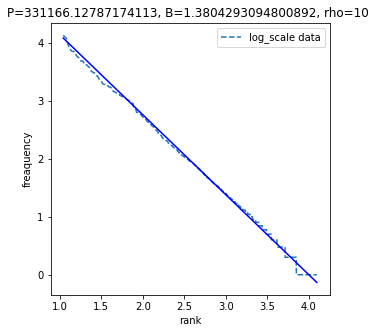

In [80]:
def zipps(sort_dict,rho=0):
    rank,freq=[],[]
    for idx, (_,i) in enumerate(sort_dict): 
        freq.append(np.log10(i))
        rank.append(np.log10(idx+1+rho))
    return rank,freq

def best_fit(x,y):
    x_bar=np.mean(x)
    y_bar=np.mean(y)
    num,den=0,0
    for i ,j in zip(x,y):
        num+=(i-x_bar)*(j-y_bar)
        den+=(i-x_bar)**2
    m=num/den
    c=y_bar-m*x_bar
    return m,c

bag_of_word=[] #bag of word
token = RegexpTokenizer(r'\w+')
for i in dataexpand:
    x=token.tokenize(i)
    bag_of_word.extend(x) 
dict_={} # dictionary with frequecy
unique=np.unique(bag_of_word)
for i in unique:
    dict_[i]=bag_of_word.count(i)
sort_dict = sorted(dict_.items(), key=lambda kv: kv[1],reverse=True)
import pandas as pd
df=pd.DataFrame(sort_dict,columns=['Word', "Frequency"])
print(df.head(10))
rho=10
rank,freq=zipps(sort_dict,rho)
m,c=best_fit(np.array(rank),np.array(freq))

freq_m = [m * i + c for i in rank]
plt.figure(figsize=(5,5))
# Plot the best fit line over the actual values
plt.plot(rank, freq, '--',label="log_scale data")
plt.plot(rank, freq_m, 'b')
plt.xlabel("rank")
plt.ylabel("freaquency")
plt.legend()
plt.title("P={}, B={}, rho={} ".format(10**(c),-m,rho))
plt.show()
        


# **TF-IDF Computation**

In [82]:
import operator
wordDict = dict.fromkeys(tokens_final, 0)

for word in tokens_final:
    wordDict[word]+=1


sorted_d = dict( sorted(wordDict.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ',sorted_d)

Dictionary in descending order by value :  {"n't": 4809, 'know': 1639, 'well': 1458, 'get': 1310, 'would': 1281, 'good': 1225, 'like': 1194, 'come': 1102, 'yes': 1100, 'right': 1078, 'got': 992, 'see': 950, 'one': 905, 'want': 763, 'think': 754, 'going': 695, 'let': 631, 'sir': 631, 'tell': 628, 'say': 614, 'time': 610, 'take': 607, 'back': 597, 'look': 578, 'man': 541, 'could': 538, 'little': 501, 'never': 466, 'way': 446, 'please': 439, 'yeah': 436, 'make': 429, 'give': 425, 'love': 408, 'father': 399, 'old': 394, 'sure': 389, 'something': 368, 'thank': 365, 'much': 364, 'mean': 355, 'miss': 349, 'must': 346, 'night': 328, 'said': 325, 'hello': 319, 'nothing': 316, 'anything': 316, 'two': 315, 'mother': 313, 'long': 303, 'away': 302, 'gon': 300, 'sorry': 286, 'find': 286, 'first': 276, 'home': 275, 'talk': 273, 'help': 273, 'thing': 263, 'people': 261, 'wait': 256, 'put': 255, 'thought': 254, 'girl': 254, 'nice': 245, 'always': 241, 'keep': 238, 'life': 229, 'mind': 229, 'ever': 223,

In [83]:
def computeTF(wordDict, bow):
    tfDict = {}
    bowCount = len(bow)
    for word, count in wordDict.items():
        tfDict[word] = count/float(bowCount)
    return tfDict

In [85]:
tfBow = computeTF(wordDict, tokens_final)
print(tfBow)

{'either': 0.00036971087100863163, 'flat': 0.00018108287559606446, 'beg': 0.000264079193577594, 'pardon': 0.00034707551155912353, 'excuse': 0.0005960644655037122, 'always': 0.0018183738757771473, 'lady': 0.000912959497796825, 'say': 0.004632703567332649, 'frighten': 5.2815838715518804e-05, 'hiccup': 2.2635359449508057e-05, 'away': 0.002278626184583811, 'marthy': 0.00024898895394458864, 'yes': 0.008299631798152955, 'going': 0.005243858272469367, 'hit': 0.0004677974286231665, 'see': 0.0071678638256775515, 'soak': 1.5090239633005372e-05, 'eye': 0.00019617311522906984, 'gon': 0.0022635359449508057, 'quit': 0.00014335727651355103, 'get': 0.009884106959618518, 'back': 0.004504436530452104, 'time': 0.004602523088066639, 'well': 0.011000784692460916, 'think': 0.005689020341643025, 'lose': 0.0002716243133940967, 'got': 0.007484758857970664, 'ten': 0.0005206132673386853, 'swallows': 7.545119816502686e-06, 'without': 0.0007846924609162793, 'breathing': 3.0180479266010744e-05, 'sure': 0.0029350516

In [86]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
  
    for word, val in docList[0].items():
      idfDict[word] = math.log10(N / float(val)+1)
        
    return idfDict

In [87]:
idfs = computeIDF([wordDict])
print(idfs)

{'either': 0.008773924307505152, 'flat': 0.017728766960431616, 'beg': 0.012234456417011586, 'pardon': 0.009340026254143432, 'excuse': 0.005462895701502187, 'always': 0.0017983234055628861, 'lady': 0.003574460358298136, 'say': 0.000706744634249057, 'frighten': 0.05799194697768673, 'hiccup': 0.12493873660829992, 'away': 0.0014356855451543387, 'marthy': 0.012964977164367635, 'yes': 0.0003946338135267612, 'going': 0.0006244350204481827, 'hit': 0.006948859955327825, 'see': 0.00045691164856618617, 'soak': 0.17609125905568124, 'eye': 0.016390416188169384, 'gon': 0.001445240874180953, 'quit': 0.02227639471115221, 'get': 0.00033139603432003187, 'back': 0.000726852859041775, 'time': 0.0007113752317871909, 'well': 0.00029776791149578575, 'think': 0.0005756057594142244, 'lose': 0.01189922329970769, 'got': 0.0004375763412025077, 'ten': 0.006248949277001542, 'swallows': 0.3010299956639812, 'without': 0.004155959771157703, 'breathing': 0.09691001300805642, 'sure': 0.0011150057007914332, 'cure': 0.045

In [88]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [89]:
tfidfBow = computeTFIDF(tfBow, idfs)
print(tfidfBow)
sorted_dd = dict( sorted(wordDict.items(), key=operator.itemgetter(1),reverse=True))
print('Dictionary in descending order by value : ',sorted_dd)

{'either': 3.243815197891535e-06, 'flat': 3.2103761019674563e-06, 'beg': 3.23086538446464e-06, 'pardon': 3.241694390132476e-06, 'excuse': 3.2562380064184278e-06, 'always': 3.270024300874144e-06, 'lady': 3.2633375336065254e-06, 'say': 3.2741383882788145e-06, 'frighten': 3.0628933183724205e-06, 'hiccup': 2.82803321229628e-06, 'away': 3.2713906760171594e-06, 'marthy': 3.2281361020713764e-06, 'yes': 3.2753153473730707e-06, 'going': 3.274448747596781e-06, 'hit': 3.250658818964848e-06, 'see': 3.27508047728826e-06, 'soak': 2.657259296427857e-06, 'eye': 3.215359003534164e-06, 'gon': 3.271354667820712e-06, 'quit': 3.1934832763316535e-06, 'get': 3.2755538492126042e-06, 'back': 3.2740625705313252e-06, 'time': 3.2741209285793026e-06, 'well': 3.275680682688897e-06, 'think': 3.2746328740744038e-06, 'lose': 3.2321183587061386e-06, 'got': 3.2751533958538634e-06, 'ten': 3.253285900533488e-06, 'swallows': 2.271307385646022e-06, 'without': 3.261150300298795e-06, 'breathing': 2.924790638258478e-06, 'sure'

In [90]:
import pandas as pd
df=pd.DataFrame([tfidfBow]).T
#print(df)
df = df.sort_values(df.columns[0],ascending=False)
  
# display 
print(df.head(10)) 

              0
n't    0.000003
know   0.000003
well   0.000003
get    0.000003
would  0.000003
good   0.000003
like   0.000003
come   0.000003
yes    0.000003
right  0.000003


# **Ambiguous words**

In [91]:
from nltk.corpus import wordnet
syns = wordnet.synsets("father")
print(syns)
print(len(syns))
print(syns[0].definition())
print(syns[0].examples())
#wordnet.synset( syns) .lemma_names ( )

[Synset('father.n.01'), Synset('forefather.n.01'), Synset('father.n.03'), Synset('church_father.n.01'), Synset('father.n.05'), Synset('father.n.06'), Synset('founder.n.02'), Synset('don.n.03'), Synset('beget.v.01')]
9
a male parent (also used as a term of address to your father)
['his father was born in Atlanta']


In [92]:
def getList(dict): 
    return dict.keys() 
      
# Driver program 

termlist=getList(sorted_dd)
print(termlist)

dict_keys(["n't", 'know', 'well', 'get', 'would', 'good', 'like', 'come', 'yes', 'right', 'got', 'see', 'one', 'want', 'think', 'going', 'let', 'sir', 'tell', 'say', 'time', 'take', 'back', 'look', 'man', 'could', 'little', 'never', 'way', 'please', 'yeah', 'make', 'give', 'love', 'father', 'old', 'sure', 'something', 'thank', 'much', 'mean', 'miss', 'must', 'night', 'said', 'hello', 'nothing', 'anything', 'two', 'mother', 'long', 'away', 'gon', 'sorry', 'find', 'first', 'home', 'talk', 'help', 'thing', 'people', 'wait', 'put', 'thought', 'girl', 'nice', 'always', 'keep', 'life', 'mind', 'ever', 'really', 'remember', 'might', 'things', 'maybe', 'told', 'name', 'leave', 'boy', 'still', 'last', 'may', 'place', 'enough', 'course', 'morning', 'new', 'need', 'dear', 'day', 'hey', 'big', 'money', 'every', 'made', 'johnny', 'everything', 'left', 'minute', 'late', 'stop', 'even', 'coming', 'car', 'work', 'believe', 'another', 'call', 'chance', 'hear', 'matter', 'around', 'feel', 'men', 'marrie

In [93]:
ambigous=[]
wordlist=[]
count=0
for i in termlist:
    syn = wordnet.synsets(i)
    if len(syn) !=0 :
      ambigous.append(syn)
      wordlist.append(i)
      count=count+1
      if count>=50:
        break;
print(wordlist)
print(ambigous)
print(len(ambigous))
print(len(wordlist))

['know', 'well', 'get', 'good', 'like', 'come', 'yes', 'right', 'got', 'see', 'one', 'want', 'think', 'going', 'let', 'sir', 'tell', 'say', 'time', 'take', 'back', 'look', 'man', 'little', 'never', 'way', 'please', 'yeah', 'make', 'give', 'love', 'father', 'old', 'sure', 'thank', 'much', 'mean', 'miss', 'must', 'night', 'said', 'hello', 'nothing', 'two', 'mother', 'long', 'away', 'sorry', 'find', 'first']
[[Synset('know.n.01'), Synset('know.v.01'), Synset('know.v.02'), Synset('know.v.03'), Synset('know.v.04'), Synset('know.v.05'), Synset('acknowledge.v.06'), Synset('know.v.07'), Synset('sleep_together.v.01'), Synset('know.v.09'), Synset('know.v.10'), Synset('know.v.11')], [Synset('well.n.01'), Synset('well.n.02'), Synset('well.n.03'), Synset('well.n.04'), Synset('well.n.05'), Synset('well.v.01'), Synset('well.a.01'), Synset('good.s.13'), Synset('well.s.03'), Synset('well.r.01'), Synset('well.r.02'), Synset('well.r.03'), Synset('well.r.04'), Synset('well.r.05'), Synset('well.r.06'), Syn